                             Исследование объявлений о продаже квартир
                          
                                      Описание проекта
  
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.


Ваша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
import seaborn as sns
df = pd.read_csv('real_estate_data.csv', sep="\t")
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


                                       Предобработка данных

Выведем основную информацию о датафрейме

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Переведем названия столбцов в нижний регистр 

In [3]:
df.columns = df.columns.str.lower()

Построим общую гистограмму для всех столбцов

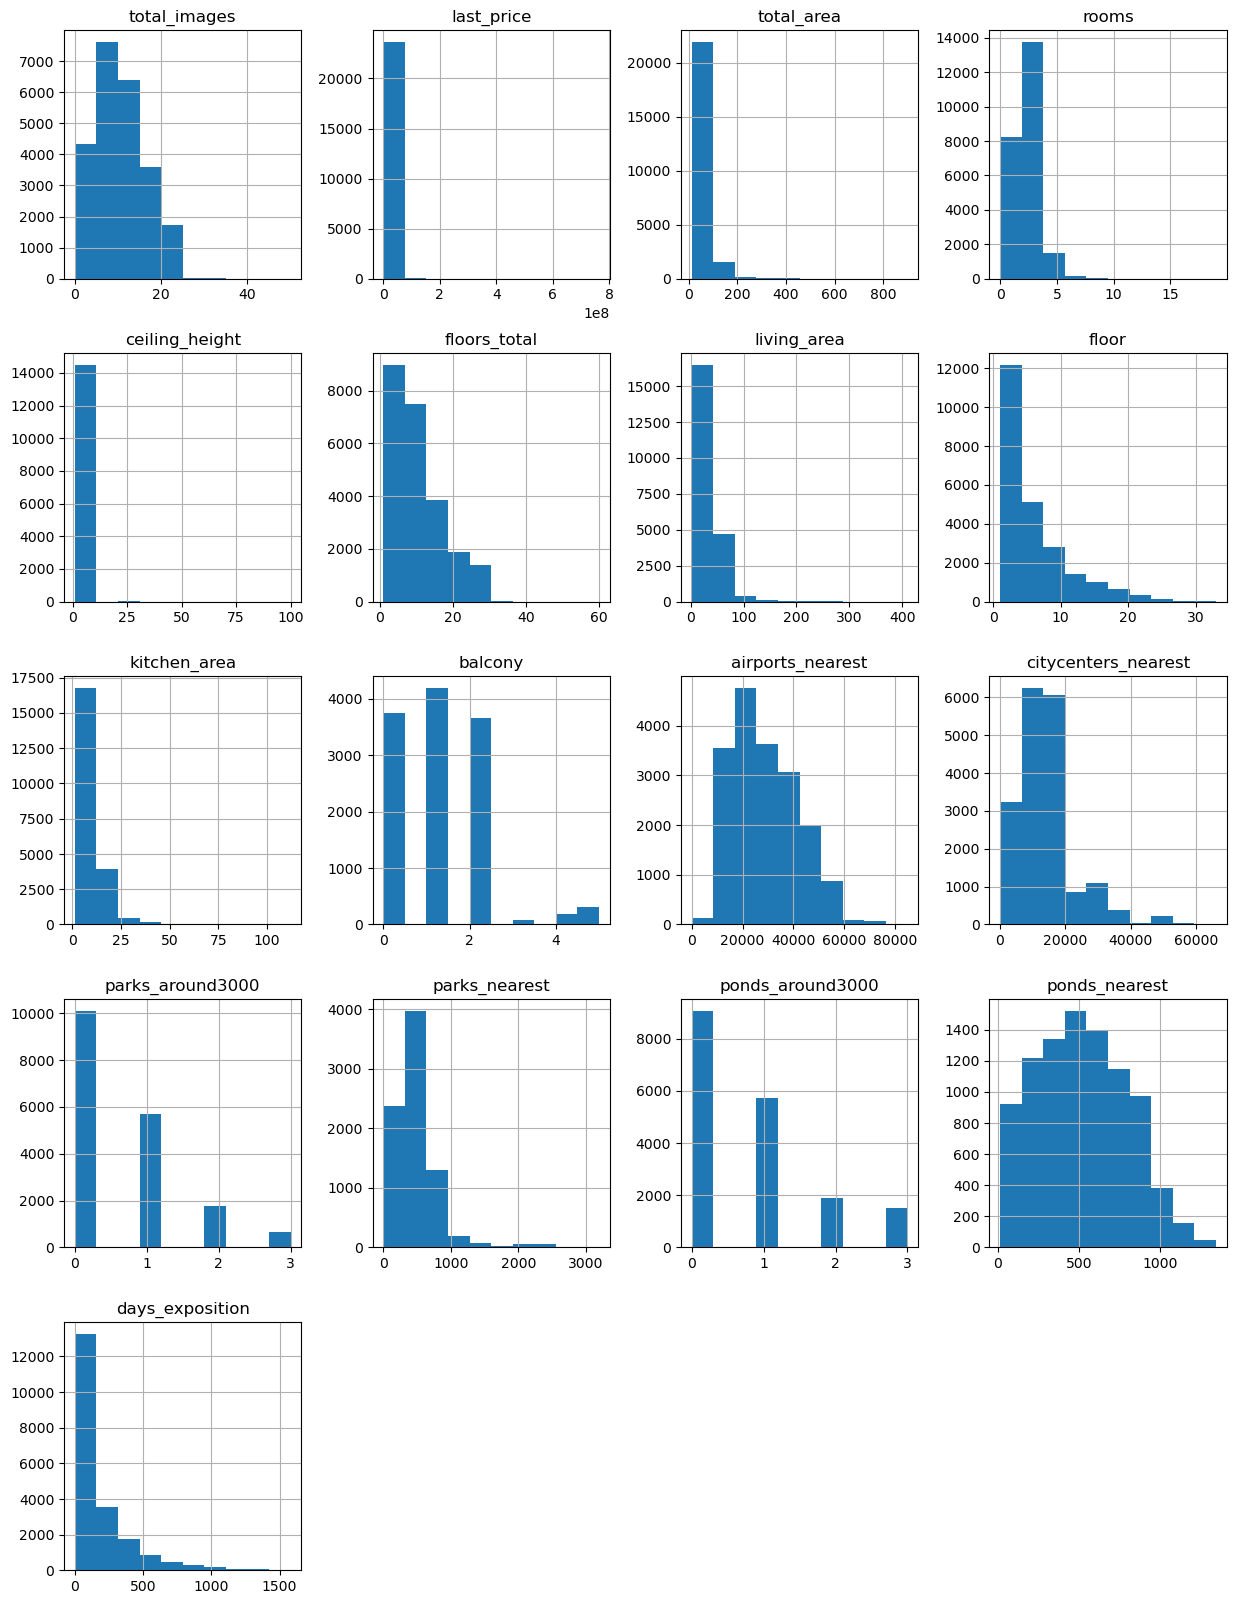

In [4]:
df.hist(figsize=(15, 20))
plt.show()

In [5]:
len(df)

23699

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Количество явных дубликатов

In [7]:
df.duplicated().sum()

0

Изучим пропущенные значения в столбцах

In [8]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
citycenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

is_apartment Апартаменты – это нежилая коммерческая недвижимость

parks_nearest - расстояние до парка 

ponds_nearest - расстояние до водоема

balcony - наличие балкона 

Построим температурный график по количеству пропусков

In [9]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
ceiling_height,39%
floors_total,0%
living_area,8%
is_apartment,88%
kitchen_area,10%
balcony,49%
locality_name,0%
airports_nearest,23%
citycenters_nearest,23%
parks_around3000,23%


Логично предположить, что если в столбцах balcony, parks_around3000, ponds_around3000 не указали данные, то истинное значение здесь равно 0, так как балконов у квартиры / водоемов или парков поблизости нет. Заменим пропуски на 0, а заодно изменим тип данных на int, так как вещественного типа данных здесь быть не может.

In [10]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

Преобразую дату в нужный вид

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

                                  Исследовательский анализ данных

Типы переменных

Количественная переменная принимает числовое значение в диапазоне: её также называют численной.

Категориальная переменная принимает значение из ограниченного набора. Другое название категориальной переменной — качественная.

In [12]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


категориальная


'rooms' ,'ceiling_height','floors_total','floor','is_apartment','studio','open_plan' ,'locality_name' 


Количественная

'total_images', 'last_price', 'total_area', 'first_day_exposition','living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'citycenters_nearest','parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest', 'days_exposition'

In [13]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Проанализируем столбец last_price на наличие выбросов:

In [15]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Диаграмма размаха

<AxesSubplot:>

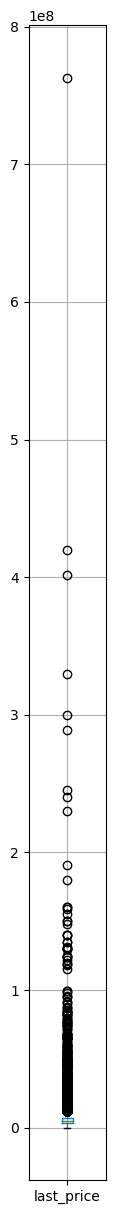

In [16]:
df.boxplot(column='last_price', grid=True, figsize=(1, 15))

Из диаграммы видно, что значения более 100 млн являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [17]:
df = df.query('last_price <= 100000000').reset_index(drop=True)

Проанализируем столбец total_area на наличие выбросов:

In [18]:
df.total_area.describe()

count    23662.000000
mean        59.928048
std         33.471517
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

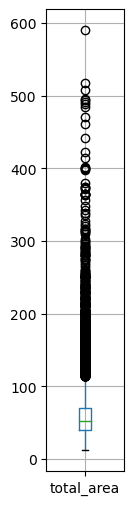

In [19]:
df.boxplot(column='total_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 400 кв.м. являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [20]:
df = df.query('total_area <= 400').reset_index(drop=True)

Проанализируем столбец rooms на наличие выбросов:

In [21]:
df.rooms.describe()

count    23648.000000
mean         2.063388
std          1.063191
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

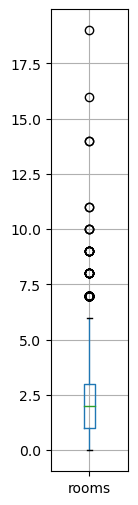

In [22]:
df.boxplot(column='rooms', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 10 являются редкими, и их можно отбросить. Сформируем набор данных, исключив эти значения:

In [23]:
df = df.query('rooms <= 10').reset_index(drop=True)

Проанализируем столбец ceiling_height:

In [24]:
df.ceiling_height.describe()

count    14465.000000
mean         2.769242
std          1.261472
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

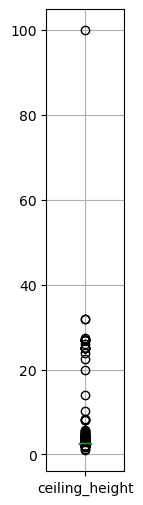

In [25]:
df.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Из диаграммы видно наличие аномалии в диапазоне высот 20-35 м. Вероятно, здесь пропущена точка в вещественных числах. Исправим эти значения:

In [26]:
def fix_the_ceil(old_ceiling_height):
    if 20 <= old_ceiling_height <= 40:
        return old_ceiling_height / 10
    return old_ceiling_height

In [27]:
df.ceiling_height = df.ceiling_height.apply(fix_the_ceil).reset_index(drop=True)

<AxesSubplot:>

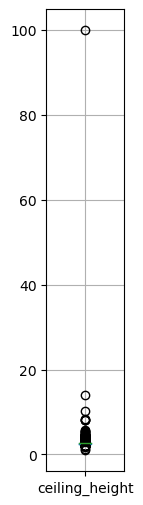

In [28]:
df.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Значения высоты полотка менее 2 м и более 6 м являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [29]:
df = df.query('(ceiling_height > 2 & ceiling_height < 6) | ceiling_height.isna()'
                           ).reset_index(drop=True)

Теперь можем заполнить оставшиеся пропуски в столбце ceiling_height медианным значением высоты потолков:

In [30]:
df.ceiling_height = df.ceiling_height.fillna(df.ceiling_height.median())
df.ceiling_height.isna().sum()

0

Проанализируем столбец floors_total:

In [31]:
df.floors_total.describe()

count    23534.000000
mean        10.681992
std          6.598637
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

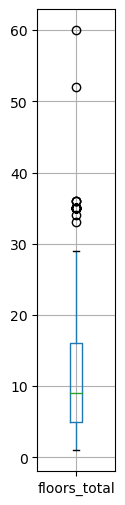

In [32]:
df.boxplot(column='floors_total', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 40 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [33]:
df = df.query('floors_total <= 40').reset_index(drop=True)

Проанализируем столбец floor:

In [34]:
df.floor.describe()

count    23532.000000
mean         5.877316
std          4.875122
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

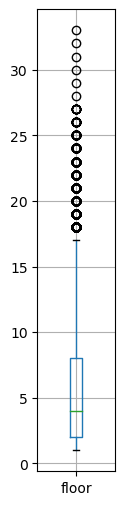

In [35]:
df.boxplot(column='floor', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 30 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [36]:
df = df.rename(columns = {'floor': 'floors'})

In [37]:
df = df.query('floors <= 30').reset_index(drop=True)

Проанализируем столбец living_area:

In [38]:
df.living_area.describe()

count    21669.000000
mean        34.095728
std         20.198336
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        255.700000
Name: living_area, dtype: float64

Построим диаграмму размаха для этого столбца для определения самых частых и экстремальных значения в столбце:

<AxesSubplot:>

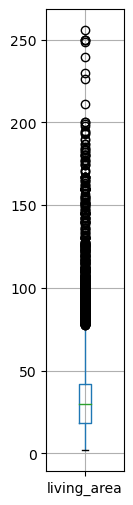

In [39]:
df.boxplot(column='living_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 200 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [40]:
df = df.query('living_area <= 200').reset_index(drop=True)

Проанализируем столбец kitchen_area:

In [41]:
df.kitchen_area.describe()

count    20865.000000
mean        10.441873
std          5.586978
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Построим диаграмму размаха для этого столбца

<AxesSubplot:>

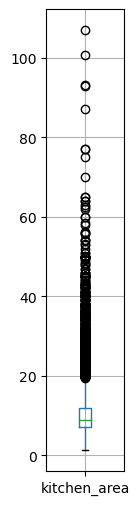

In [42]:
df.boxplot(column='kitchen_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 80 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [43]:
df = df.query('kitchen_area <= 80').reset_index(drop=True)

Доработаем остальные данные

Заменяем NaN и False на 0, а True на 1 в новом столбце apartment

In [44]:
df['new_apartment'] = df['is_apartment'].replace({float('nan'): 0, False: 0, True: 1})

In [45]:
df['new_apartment'].value_counts(dropna=False)

0    20830
1       30
Name: new_apartment, dtype: int64

In [46]:
df['studio'].value_counts(dropna=False)

False    20860
Name: studio, dtype: int64

In [47]:
df['open_plan'].value_counts(dropna=False)

False    20860
Name: open_plan, dtype: int64

In [48]:
df['locality_name'].value_counts(dropna=False).head(20)

Санкт-Петербург            13965
посёлок Мурино               402
посёлок Шушары               392
Всеволожск                   356
Пушкин                       336
Колпино                      322
Гатчина                      290
посёлок Парголово            288
деревня Кудрово              226
Петергоф                     190
Выборг                       188
Сестрорецк                   166
Красное Село                 164
Кудрово                      149
Сертолово                    132
деревня Новое Девяткино      132
Ломоносов                    124
Сланцы                        96
Волхов                        91
Тосно                         91
Name: locality_name, dtype: int64

In [49]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

Нужно убрать ё из названий , чтобы не было дублей 

In [50]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [51]:
df['locality_name'].nunique()

311

цена 1 квадратного метра

In [52]:
df['m2'] = df['last_price'] / df['total_area']

день публикации  (0 - понедельник, 1 - вторник ..)

In [53]:
df['day_exposition'] = df['first_day_exposition'].dt.dayofweek

месяц публикации

In [54]:
df['month_exposition'] = df['first_day_exposition'].dt.month

год публикации

In [55]:
df['year_exposition'] = df['first_day_exposition'].dt.year

расстояние до центра города в километрах 

In [56]:
df['citycenters_nearest_km'] = df['citycenters_nearest'] / 1000
round(df['citycenters_nearest_km'])

0        16.0
1        19.0
2        14.0
3         8.0
4         NaN
         ... 
20855     NaN
20856    34.0
20857     4.0
20858     NaN
20859     NaN
Name: citycenters_nearest_km, Length: 20860, dtype: float64

тип этажа квартиры (значения — «первый», «последний», «другой»)

In [57]:
def floor_1(этаж):
    if этаж ['floors'] == 1:
        return 'первый'
    elif этаж ['floors'] == этаж ['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_1'] = df.apply(floor_1,axis = 1)

In [58]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floors,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_apartment,m2,day_exposition,month_exposition,year_exposition,citycenters_nearest_km,floor_1
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755.0,NaN,0,120370.370370,3,3,2019,16.028,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0,NaN,81.0,0,82920.792079,1,12,2018,18.603,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2,574.0,558.0,0,92785.714286,3,8,2015,13.933,другой
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,48.0,121.0,0,100000.000000,1,6,2018,8.098,другой
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,...,0,NaN,55.0,0,95065.789474,0,9,2018,NaN,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20855,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,NaN,...,0,NaN,413.0,0,45000.000000,4,7,2017,NaN,другой
20856,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,1,675.0,239.0,0,73717.948718,4,8,2016,34.104,другой
20857,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,3,381.0,NaN,0,72490.845228,1,3,2017,4.232,другой
20858,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,0,NaN,45.0,0,52542.372881,0,1,2018,NaN,другой


          Изучим параметры объектов недвижимости:

In [59]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floors',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'new_apartment', 'm2',
       'day_exposition', 'month_exposition', 'year_exposition',
       'citycenters_nearest_km', 'floor_1'],
      dtype='object')

Text(0, 0.5, 'Количество квартир')

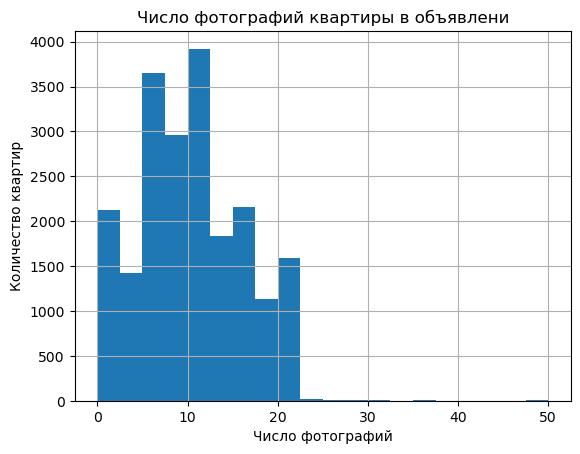

In [60]:
df.hist('total_images', bins=20);
plt.title('Число фотографий квартиры в объявлени')
plt.xlabel('Число фотографий')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

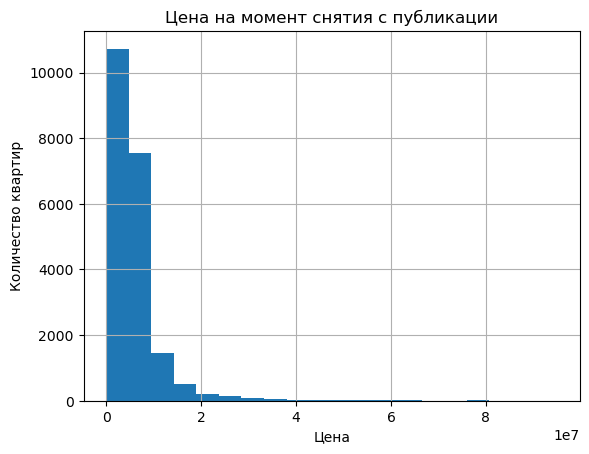

In [61]:
df.hist('last_price', bins=20);
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

In [62]:
df['last_price'].value_counts(dropna=False)  

4500000.0     307
3500000.0     254
4200000.0     245
4300000.0     237
4000000.0     236
             ... 
8037000.0       1
60309900.0      1
4985000.0       1
7778000.0       1
9470000.0       1
Name: last_price, Length: 2505, dtype: int64

Text(0, 0.5, 'Количество квартир')

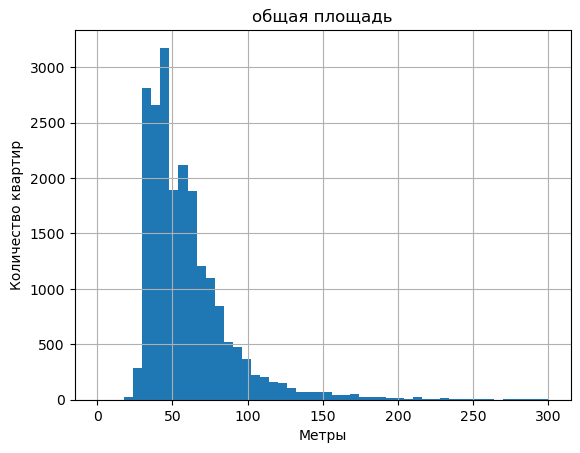

In [63]:
df['total_area'].hist(range=(0, 300), bins=50)
plt.title('общая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

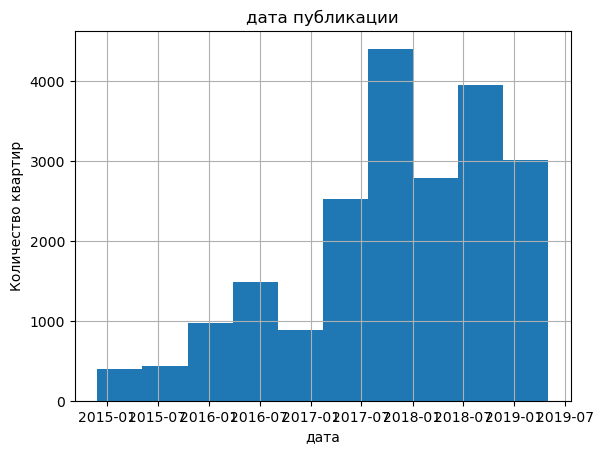

In [64]:
df['first_day_exposition'].hist()
plt.title('дата публикации')
plt.xlabel('дата')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

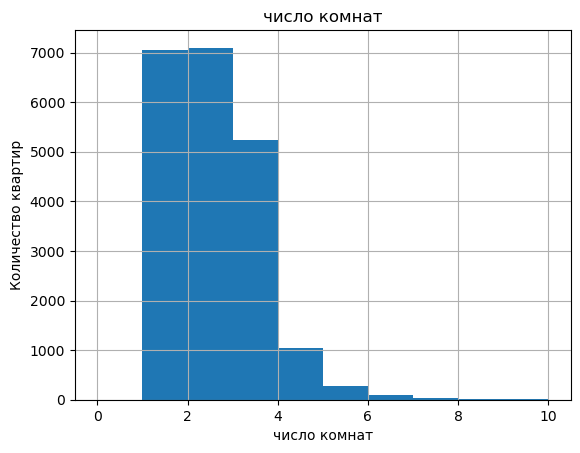

In [65]:
df['rooms'].hist(range=(0, 10), bins=10)
plt.title('число комнат')
plt.xlabel('число комнат')
plt.ylabel('Количество квартир')

In [66]:
df['rooms'].value_counts(dropna=False)  

2     7098
1     7055
3     5245
4     1051
5      267
6       89
7       39
8        8
9        5
10       3
Name: rooms, dtype: int64

Больше всего проедается квартир с количеством комнат 1 и 2, что логично и в целом соответствует рынку недвижимости.
Далее идут 3х комнатные 

In [67]:
print('Квартиры без комнат:',df.query('rooms == 0')['rooms'].count())

Квартиры без комнат: 0


Text(0, 0.5, 'Количество квартир')

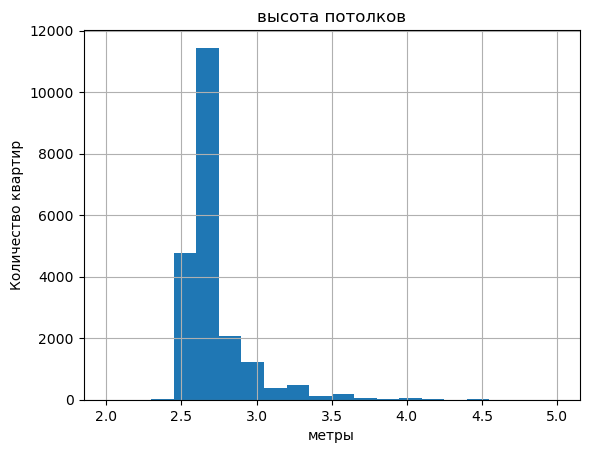

In [68]:
df['ceiling_height'].hist(range=(2, 5), bins=20)
plt.title('высота потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')

Наиболее часто встречающиеся высоты потолков 2,5 и 2,6 м что соответствуем двум самым полпулярным классам объектом недвижимости.

Text(0, 0.5, 'Количество квартир')

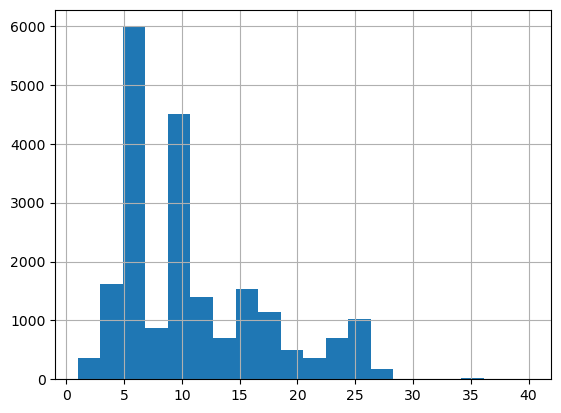

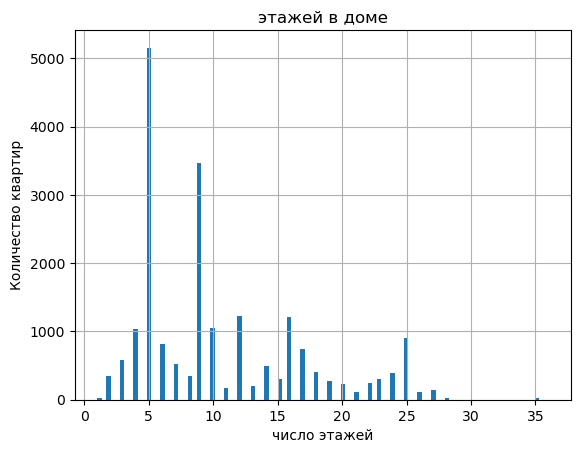

In [69]:
df['floors_total'].hist(range=(1, 40), bins=20)
df.hist('floors_total', bins=100);
plt.title('этажей в доме')
plt.xlabel('число этажей')
plt.ylabel('Количество квартир')

Наибольшее число квартир продавалось в 5-этажных домах и 9-этажных.

Text(0, 0.5, 'Количество квартир')

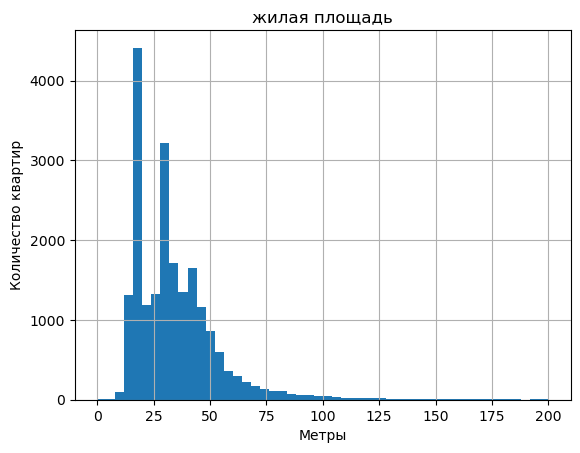

In [70]:
df['living_area'].hist(range=(0, 200), bins=50)
plt.title('жилая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

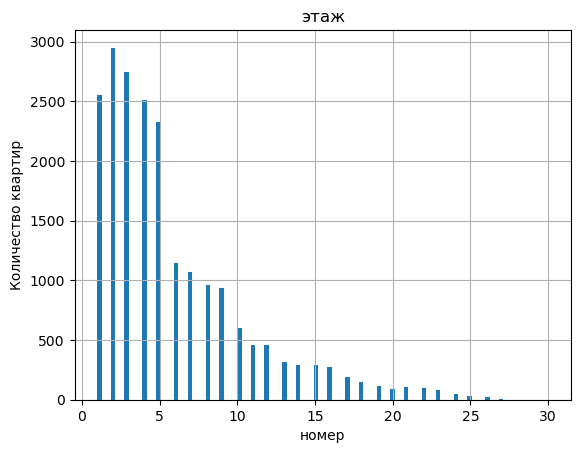

In [71]:
df.hist('floors', bins=100);
plt.title('этаж')
plt.xlabel('номер')
plt.ylabel('Количество квартир')     

Судя по гистограмме, чаще всего продавались объекты высотой до 6 этажа

In [72]:
df['is_apartment'].value_counts(dropna=False)

NaN      18333
False     2497
True        30
Name: is_apartment, dtype: int64

In [73]:
df['studio'].value_counts(dropna=False)

False    20860
Name: studio, dtype: int64

In [74]:
df['open_plan'].value_counts(dropna=False)

False    20860
Name: open_plan, dtype: int64

Text(0, 0.5, 'Количество квартир')

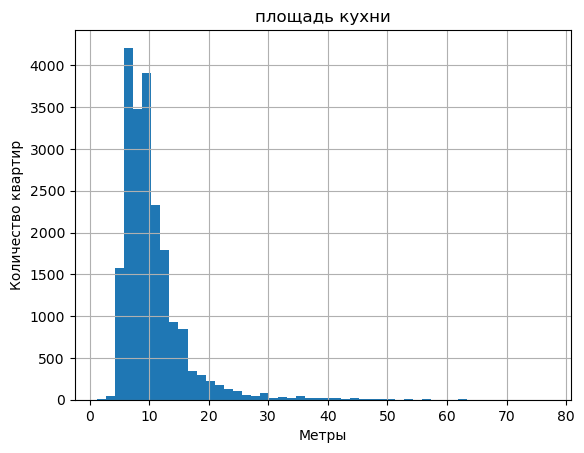

In [75]:
df.hist('kitchen_area', bins=50);
plt.title('площадь кухни')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

In [76]:
df['balcony'].value_counts(dropna=False)  

0    13035
1     3964
2     3341
5      275
4      172
3       73
Name: balcony, dtype: int64

In [77]:
df['locality_name'].value_counts(dropna=False)  

Санкт-Петербург                                      13965
поселок Мурино                                         430
поселок Шушары                                         392
Всеволожск                                             356
Пушкин                                                 336
                                                     ...  
село Никольское                                          1
деревня Бор                                              1
поселок Тесово-4                                         1
поселок при железнодорожной станции Приветнинское        1
поселок Дзержинского                                     1
Name: locality_name, Length: 312, dtype: int64

Text(0, 0.5, 'Количество квартир')

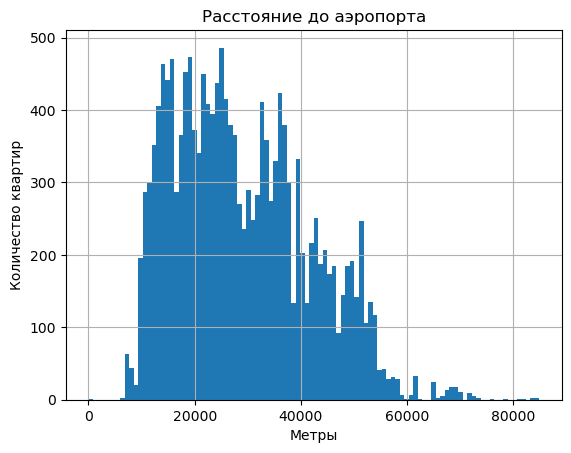

In [78]:
df.hist('airports_nearest', bins=100);
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Удаленность объектов недвижимости от аэропортов сильно разбросана, но все же преобладают объекты с расстоянием до аэропорта 12-14 км.

Text(0, 0.5, 'Количество квартир')

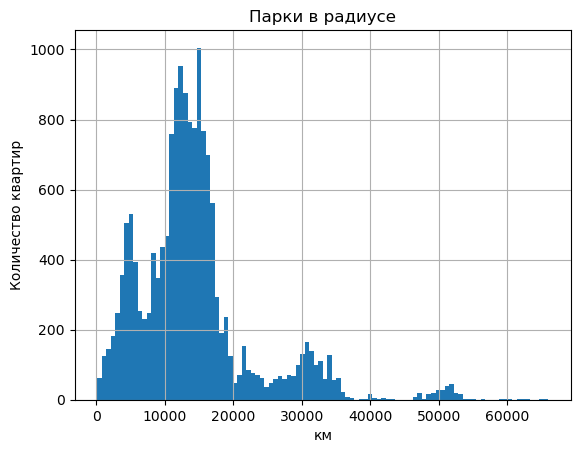

In [79]:
df.hist('citycenters_nearest', bins=100);
plt.title('Парки в радиусе')
plt.xlabel('км')
plt.ylabel('Количество квартир')

Чаще всего продавались объекты, удаленные от центра на 12-16 км

Text(0, 0.5, 'Количество квартир')

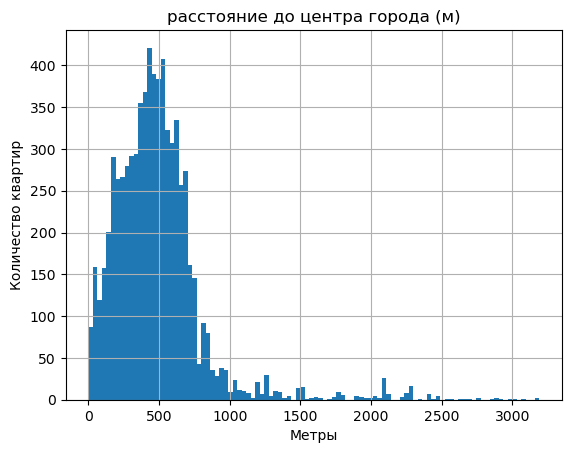

In [80]:
df.hist('parks_nearest', bins=100);
plt.title('расстояние до центра города (м)')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Самое частое расстояние до парка среди продаваемых объектов составляет 450 м.

Text(0, 0.5, 'Количество квартир')

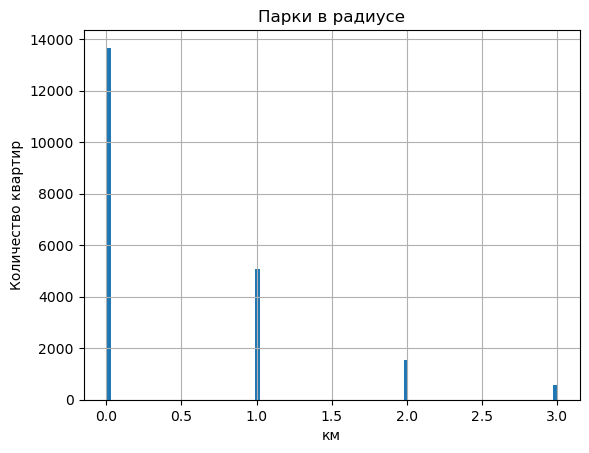

In [81]:
df.hist('parks_around3000', bins=100);
plt.title('Парки в радиусе')
plt.xlabel('км')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

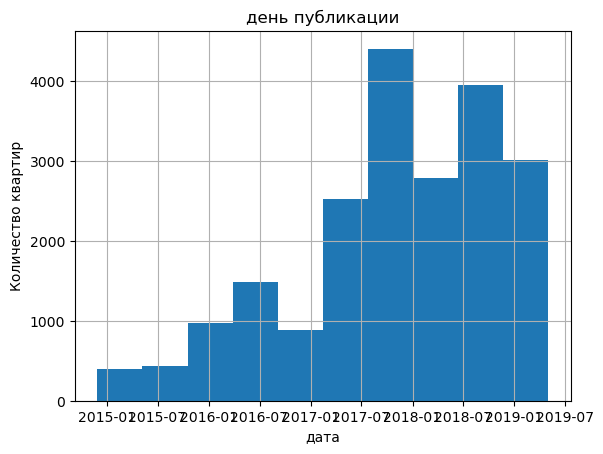

In [82]:
df.hist('first_day_exposition');
plt.title('день публикации')
plt.xlabel('дата')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

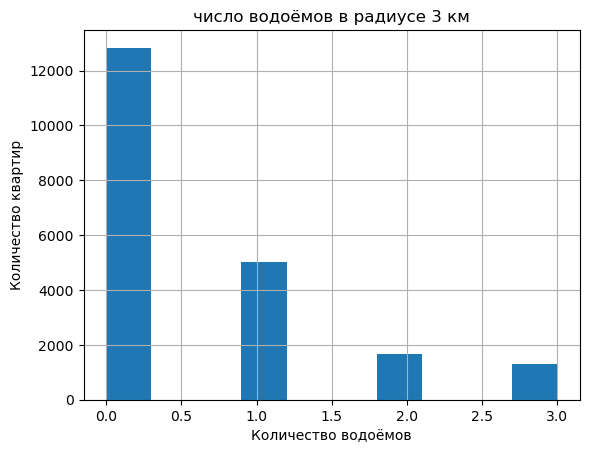

In [83]:
df.hist('ponds_around3000');
plt.title('число водоёмов в радиусе 3 км')
plt.xlabel('Количество водоёмов')
plt.ylabel('Количество квартир')      

Text(0, 0.5, 'Количество квартир')

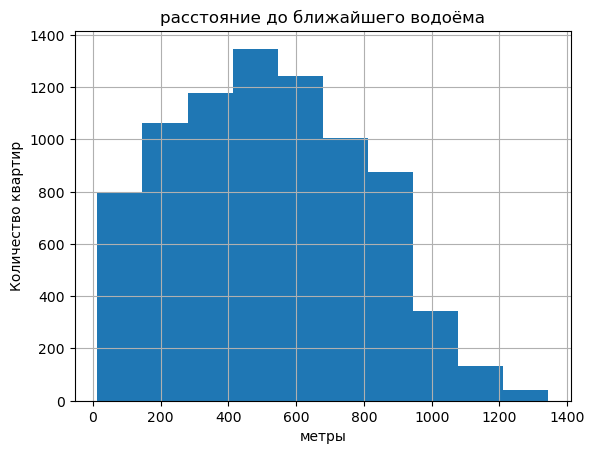

In [84]:
df.hist('ponds_nearest');
plt.title('расстояние до ближайшего водоёма')
plt.xlabel('метры')
plt.ylabel('Количество квартир')      

Text(0, 0.5, 'Количество квартир')

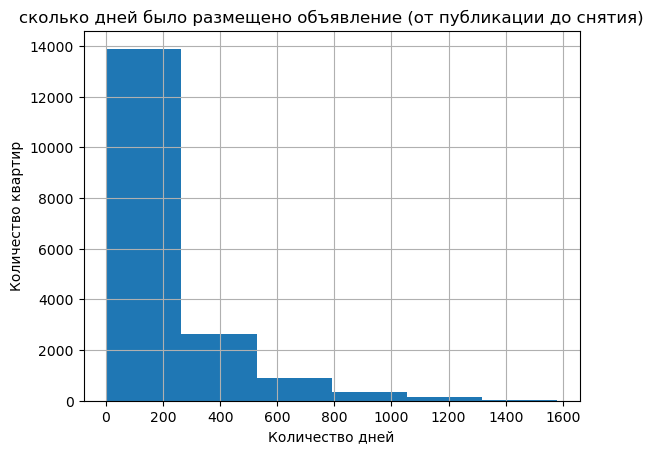

In [85]:
df['days_exposition'].hist(bins=6)
plt.title('сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')   

обычно продавались за 200-250 дней 

In [86]:
df['new_apartment'].value_counts(dropna=False)  

0    20830
1       30
Name: new_apartment, dtype: int64

Text(0, 0.5, 'Количество квартир')

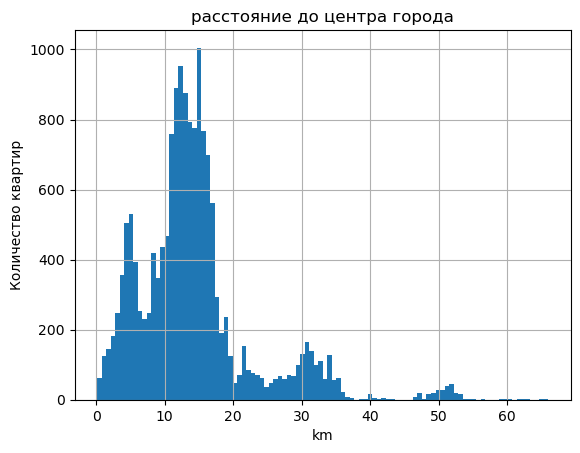

In [87]:
df.hist('citycenters_nearest_km', bins=100);
plt.title('расстояние до центра города')
plt.xlabel('km')
plt.ylabel('Количество квартир')

In [88]:
df['floor_1'].value_counts(dropna=False)  

другой       15330
последний     2977
первый        2553
Name: floor_1, dtype: int64

Большая часть продаваемых квартир расположена ни на первых ни на последних этажах, первые и последние этаже продаются реже.

Text(0, 0.5, 'Цена')

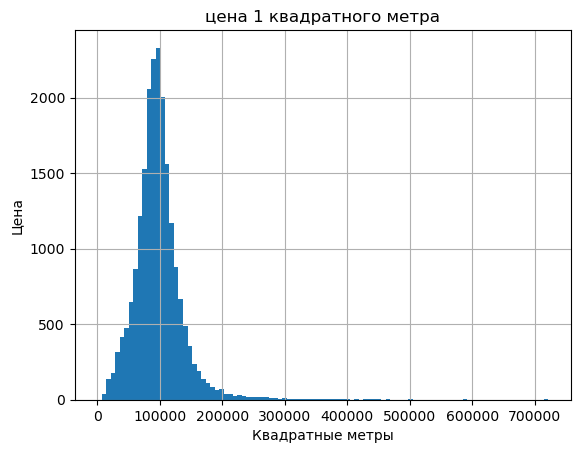

In [89]:
df.hist('m2', bins=100);
plt.title('цена 1 квадратного метра')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')

Text(0, 0.5, 'Количество квартир')

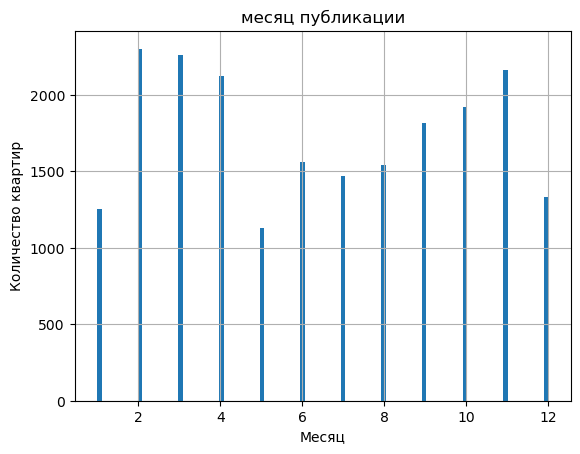

In [90]:
df.hist('month_exposition', bins=100);
plt.title('месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

-Февраль
-Март
-Ноябрь 
-Апрель
-Октябрь
-Сентябрь

в эти месяцы больше всего публикаций 

Text(0, 0.5, 'Количество квартир')

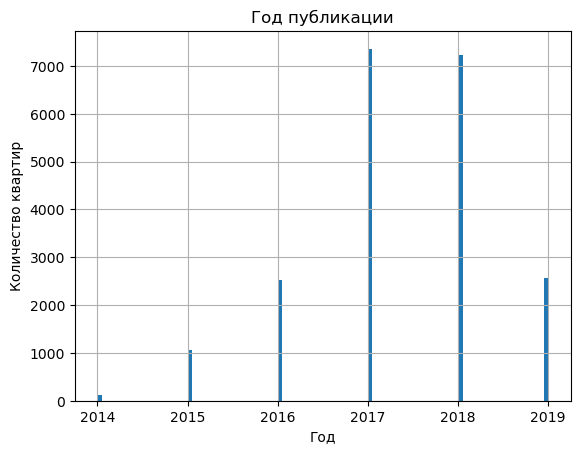

In [91]:
df.hist('year_exposition', bins=100);
plt.title('Год публикации')
plt.xlabel('Год')
plt.ylabel('Количество квартир')

Для более детальной оценки скорости продажи можно оценить ее в зависмости от других факторов, например, от месяца подачи объявления:

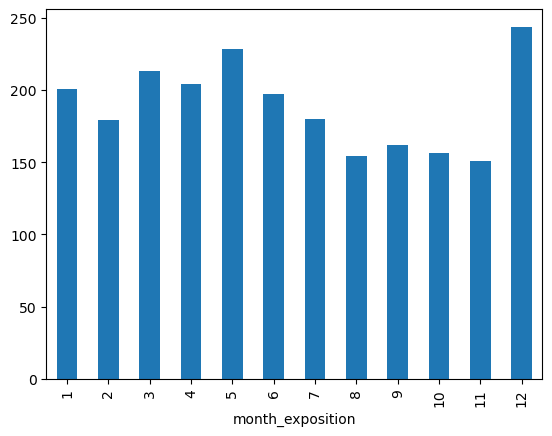

In [92]:
df.groupby('month_exposition')['days_exposition'].mean().plot.bar()
plt.show()

Таким образом мы обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего - размещенные в мае.

                  Изучим факторы, влияющие на общую (полную) стоимость объекта

In [93]:
t = df.corr()

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

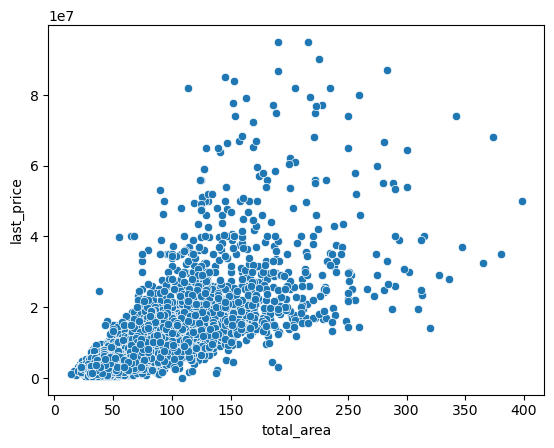

In [94]:
seaborn.scatterplot(x='total_area', y='last_price', data=df)

Построим диаграмму рассеяния с линией регрессии:

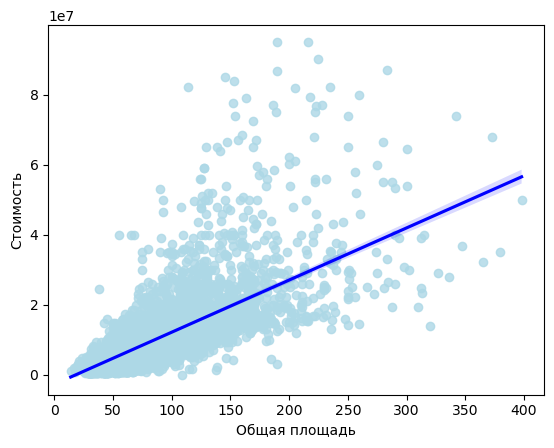

In [95]:
seaborn.regplot(
    x='total_area', 
    y='last_price', 
    data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Общая площадь')
plt.ylabel(
    'Стоимость')
plt.show()


Из диаграммы видно, что с ростом общей площади растет и цена, при этом также увеличивается разброс цен на объекты одинаковой площади.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [96]:
round(df['total_area'].corr(df['last_price']), 2)

0.76

                     Проанализируем зависимость цены от жилой площади объекта:
Построим диаграмму рассеяния с линией регрессии:

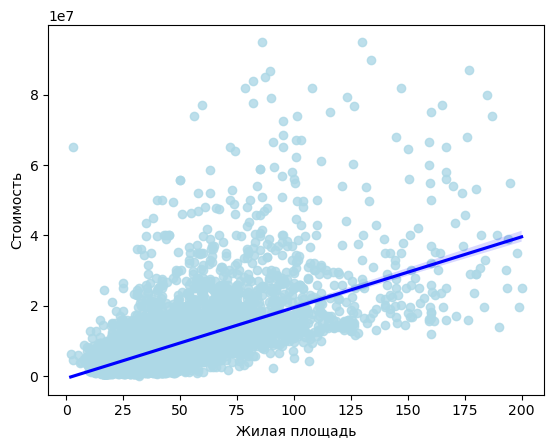

In [97]:
seaborn.regplot(
    x='living_area', 
    y='last_price', 
    data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Жилая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [98]:
round(df['living_area'].corr(df['last_price']), 2)

0.66

Из диаграммы видно, что с ростом жилой площади растет и цена, при этом также увеличивается разброс цен на объекты с одинаковой жилой площадью. Однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

              Проанализируем зависимость цены от площади кухни объекта:
Построим диаграмму рассеяния с линией регрессии:

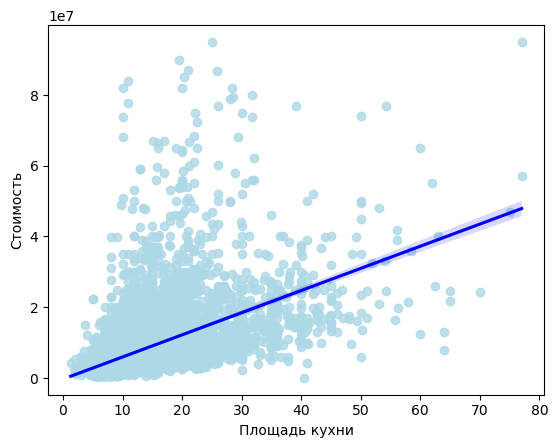

In [99]:
seaborn.regplot(
    x='kitchen_area', 
    y='last_price', 
    data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Площадь кухни')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [100]:
round(df['kitchen_area'].corr(df['last_price']), 2)

0.57

Из диаграммы видно, что с ростом площади кухни растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

                  Проанализируем зависимость цены от количества комнат объекта:
Построим диаграмму рассеяния с линией регрессии:

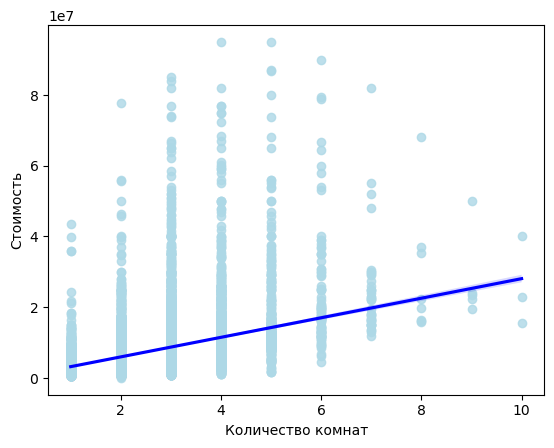

In [101]:
seaborn.regplot(
    x='rooms', 
    y='last_price', 
    data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Количество комнат')
plt.ylabel(
    'Стоимость')
plt.show()

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [102]:
round(df['rooms'].corr(df['last_price']), 2)

0.48

Из диаграммы видно, что с ростом количества комнат растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади. На объекты с количеством комнат равным 5 наблюдается наибольший разброс цен.

          Проанализируем зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):
Построим гистограмму:

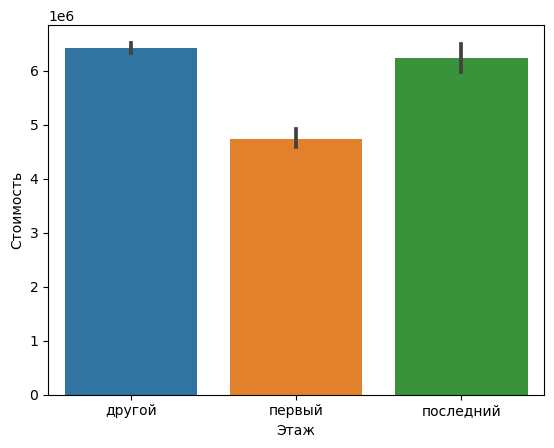

In [103]:
seaborn.barplot(
    x='floor_1', 
    y='last_price', 
    data=df)
plt.xlabel(
    'Этаж')
plt.ylabel(
    'Стоимость')
plt.show()

Из гистограммы видно, что самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже.

Проанализируем зависимость цены от дня недели размещения объявления:
Построим гистограмму:

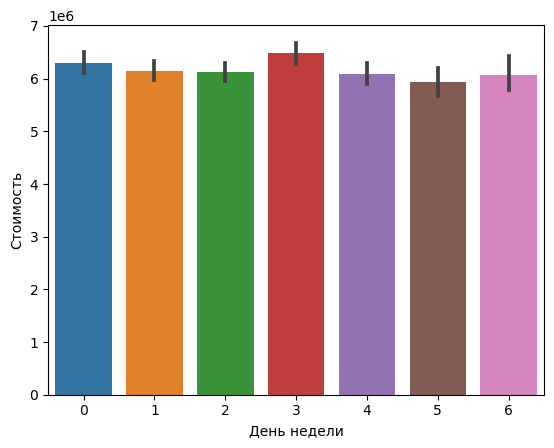

In [104]:
seaborn.barplot(
    x='day_exposition', 
    y='last_price', 
    data=df)
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дороже всего продавались квартиры, размещенные в объявлениях по четвергам.

                 Проанализируем зависимость цены от месца размещения объявления:
Построим гистограмму:

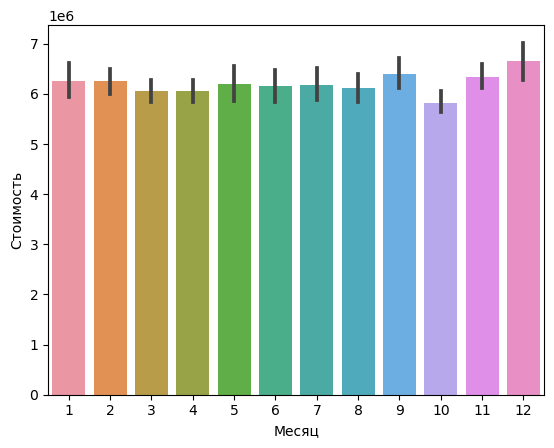

In [105]:
seaborn.barplot(
    x='month_exposition', 
    y='last_price', 
    data=df)
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

Для большей наглядности построим точечную диаграмму:

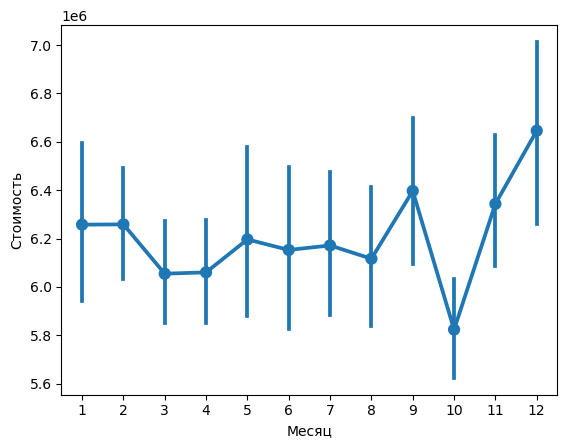

In [106]:
seaborn.pointplot(
    x='month_exposition', 
    y='last_price', 
    data=df)
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дешевле всего продавались квартиры, размещенные в объявлениях в октябре, а дороже всего - размещенные в декабре.

                        Проанализируем зависимость цены от года размещения объявления:
Построим гистограмму:

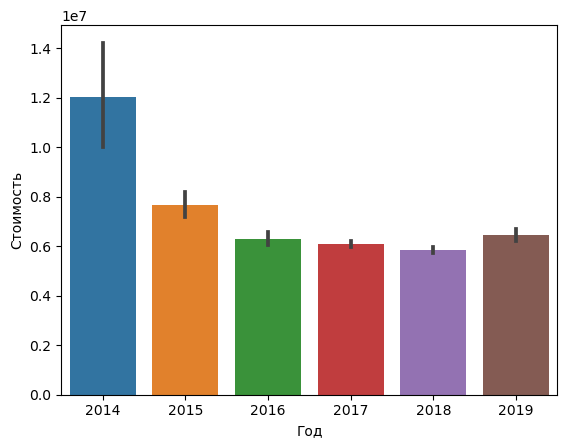

In [107]:
seaborn.barplot(
    x='year_exposition', 
    y='last_price', 
    data=df)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но на уменьшение стоимости квартир могло повлиять уменьшение их площади. Проверим это предположение, проанализировав зависимость площади и цены квадратного метра от года размещения объявления:

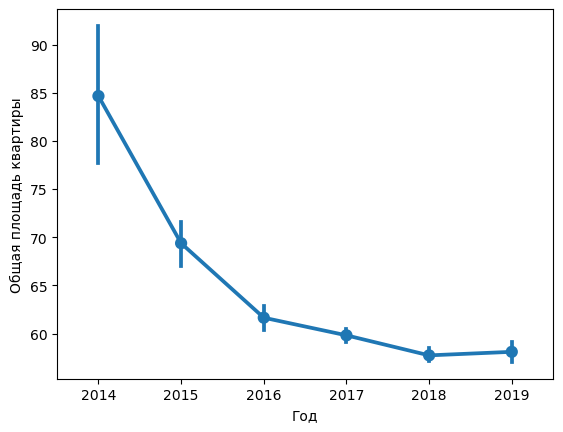

In [108]:
seaborn.pointplot(
    x='year_exposition', 
    y='total_area', 
    data=df)
plt.xlabel(
    'Год')
plt.ylabel(
    'Общая площадь квартиры')
plt.show()

Действительно, в 2018 г были минимальные площади продаваемых квартир, что обусловило и минимальные цены на объекты недвижимости. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.

                     Проанализируем цену одного квадратного метра

Посчитаем медианную цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [109]:
median_prices = df.groupby('locality_name')['m2']\
                        .agg(['count','median'])\
                        .sort_values(by='count', ascending=False).head(10)
median_prices

,count,median
locality_name,,
Санкт-Петербург,13965,104145.833333
поселок Мурино,430,84922.646605
поселок Шушары,392,77223.320158
Всеволожск,356,65811.403509
Пушкин,336,100000.000000
Колпино,322,74723.748474
Гатчина,290,67746.286082
поселок Парголово,288,92271.978022
деревня Кудрово,226,91715.116279


Населенный пункт с минимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):

In [110]:
median_prices[median_prices['median'] == median_prices['median'].min()]

,count,median
locality_name,,
Всеволожск,356,65811.403509


Населенный пункт с максимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):

In [111]:
median_prices[median_prices['median'] == median_prices['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,13965,104145.833333


Выделим цветом максимальную и минимальную стоимости квадратного метра среди 10 населенных пунктов с наибольшим количесвом объявлений, построив температурный график (синий - минимальный, красный - максимальный):

In [112]:
pd.DataFrame(median_prices['median'].to_frame(name='Цена кв.м.')).style.background_gradient('coolwarm')

,Цена кв.м.
locality_name,
Санкт-Петербург,104145.833333
поселок Мурино,84922.646605
поселок Шушары,77223.320158
Всеволожск,65811.403509
Пушкин,100000.000000
Колпино,74723.748474
Гатчина,67746.286082
поселок Парголово,92271.978022
деревня Кудрово,91715.116279


Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Всеволожске.

           Проанализируем стоимость объектов в зависимости от расстояния до центра в километрах:

In [113]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floors,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_apartment,m2,day_exposition,month_exposition,year_exposition,citycenters_nearest_km,floor_1
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755.0,NaN,0,120370.370370,3,3,2019,16.028,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0,NaN,81.0,0,82920.792079,1,12,2018,18.603,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2,574.0,558.0,0,92785.714286,3,8,2015,13.933,другой
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,48.0,121.0,0,100000.000000,1,6,2018,8.098,другой
4,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,...,0,NaN,55.0,0,95065.789474,0,9,2018,NaN,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20855,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,NaN,...,0,NaN,413.0,0,45000.000000,4,7,2017,NaN,другой
20856,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,1,675.0,239.0,0,73717.948718,4,8,2016,34.104,другой
20857,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,3,381.0,NaN,0,72490.845228,1,3,2017,4.232,другой
20858,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,0,NaN,45.0,0,52542.372881,0,1,2018,NaN,другой


In [114]:
# Максимальная цена за квадрат
print('Максимальная цена за квадрат:', df.m2.max())
# Средняя цена за квадрат
print('Средняя цена за квадрат:', df.m2.mean())
# Медианная цена за квадрат
print('Медианная цена за квадрат:', df.m2.median())
# Минимальная цена за квадрат
print('Минимальная цена за квадрат:', df.m2.min())

Максимальная цена за квадрат: 721518.9873417722
Средняя цена за квадрат: 98315.31557050029
Медианная цена за квадрат: 94855.30546623794
Минимальная цена за квадрат: 111.8348623853211


In [115]:
prices_km_to_center = df.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='citycenters_nearest_km', values='m2')
prices_km_to_center

,m2
citycenters_nearest_km,
0.181,195591.194969
0.208,172619.047619
0.215,109900.000000
0.287,88796.296296
0.291,101321.585903
...,...
28.109,68468.468468
28.644,85191.334598
28.806,79890.310786


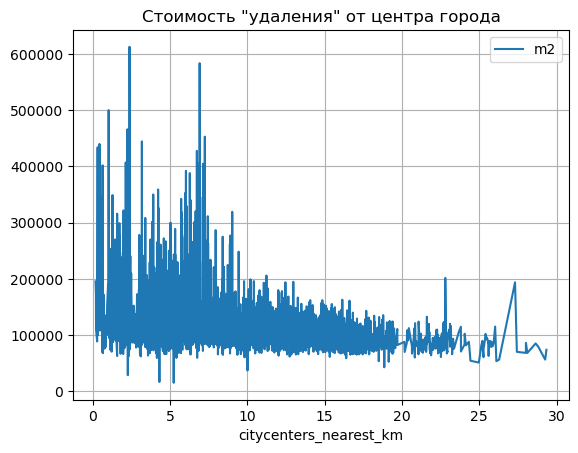

In [116]:
prices_km_to_center.plot(grid=True, title = 'Cтоимость "удаления" от центра города')
plt.show()

В целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

Выделим квартиры в центре Санкт-Петербурга в отдельный срез данных.

In [117]:
spb_centre = df.loc[df['citycenters_nearest_km'] < 7]
spb = spb_centre[['locality_name','total_area','living_area','kitchen_area','last_price']].reset_index(drop=True)
spb.corr()

,total_area,living_area,kitchen_area,last_price
total_area,1.000000,0.934625,0.519283,0.693465
living_area,0.934625,1.000000,0.322051,0.585931
kitchen_area,0.519283,0.322051,1.000000,0.502867
last_price,0.693465,0.585931,0.502867,1.000000


                                    Общий вывод



Для исследования объявлений о продаже квартир мы проанализировали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

В процессе обработки обнаружили наибольшее количество пропусков в столбце is_apartment.Проанализировав строки с пропусками, сделали следующие предположения:
- Пропуски в столбце is_apartment, вероятно, связаны с тем, что данные объекты недвижимости не являются апартаментами
- Пропуски в графе balcony, вероятно, связаны с тем, что в данных объектах недвижимости нет балконов, их заменили нулями
- Пропуски высоты потолков заполнили медианным значением. 
- Пропуски в графах «Название н.п.» и «Общее кол-во этажей» отбросили, т.к. они составляли малую долю в общих данных.

Далее выполнили поиск дубликатов и заменили разные написания названий одних и тех же населенных пунктов - на единые. 


Проанализировав редкие и выбивающиеся значения отбросили данные о квартирах стоимостью более 100 млн общей площадью более 400 кв.м. с числом комнат более 10, высотой потолков более 6 м. и менее 2 м, располагающиеся выше 30 этажа, в домах высотой более 40 этажей, с жилой площадью более 200 кв.м. И площадью кухни более 80 кв.м.


Затем посчитали и добавили в таблицу данные о стоимости одного квадратного метра, дне недели, месяце и годе публикации объявления, типе этажа квартиры и расстоянии до центра города в км.


  Далее провели исследовательский анализ данных:


 Изучив параметры объектов недвижимости, сделали вывод о наиболее продаваемом объекте недвижимости:
 - это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью 40-45 кв.м. 
 - с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м.,
 - стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м.,
 - удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км.
 
 
 В конце года происходил резкий рост количества объявления о продаже.
 
 
Проведя анализ скорости продажи квартир, обнаружили, что среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего. 


Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более. 
Также обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего - размещенные в мае.


Изучив факторы, влияющие на стоимость объекта, выяснили

- Что больше всего на стоимость влияет полная площадь объектов. При этом самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже. 

- Также дороже всего продавались квартиры, размещенные в объявлениях по четвергам в апреле и декабре, а дешевле всего - в октябре.


 Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но падение стоимости квартир было обусловлено тем, что в 2018 г. были минимальные площади продаваемых объектов. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.
 
Проанализировав цену одного квадратного метра, выяснили, что среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Всеволожске.

Проанализировав стоимость объектов в зависимости от расстояния до центра в километрах убедились, что в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.